In [19]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [32]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'E:\Files\cell_images\Train'
valid_path = 'E:\Files\cell_images\Test'

In [33]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:

# don't train existing weights
for layer in VGG_model.layers:
    layer.trainable = False

In [35]:

# useful for getting number of output classes
folders = glob('E:\Files\cell_images\Train\*')

In [36]:
# our layers - you can add more if you want
x = Flatten()(VGG_model.output)

In [37]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG_model.input, outputs=prediction)

In [38]:
# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [39]:
from tensorflow.keras.layers import MaxPooling2D

In [40]:

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)            

In [41]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [42]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('E:\Files\cell_images\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [45]:

test_set = test_datagen.flow_from_directory('E:\Files\cell_images\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [47]:
%%time

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
862/862 [==============================] - 1621s 2s/step - loss: 0.3077 - accuracy: 0.8788 - val_loss: 0.2066 - val_accuracy: 0.9362
Epoch 2/10
862/862 [==============================] - 1379s 2s/step - loss: 0.2060 - accuracy: 0.9340 - val_loss: 0.1700 - val_accuracy: 0.9539
Epoch 3/10
862/862 [==============================] - 661s 767ms/step - loss: 0.1870 - accuracy: 0.9398 - val_loss: 0.1774 - val_accuracy: 0.9500
Epoch 4/10
862/862 [==============================] - 859s 996ms/step - loss: 0.1750 - accuracy: 0.9432 - val_loss: 0.2060 - val_accuracy: 0.9438
Epoch 5/10
862/862 [==============================] - 976s 1s/step - loss: 0.1677 - accuracy: 0.9477 - val_loss: 0.2388 - val_accuracy: 0.9460
Epoch 6/10
862/862 [==============================] - 645s 748ms/step - loss: 0.1554 - accuracy: 0.9510 - val_loss: 0.1440 - val_accuracy: 0.9588
Epoch 7/10
862/862 [==============================] - 677s 785ms/step - loss: 0.1437 - accuracy: 0.9541 - val_loss: 0.1473 - val_ac

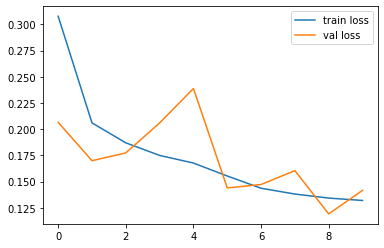

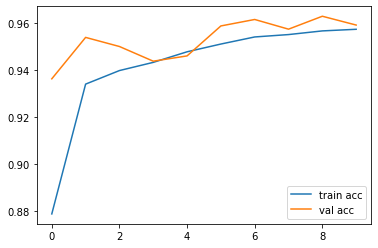

<Figure size 432x288 with 0 Axes>

In [48]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [49]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [50]:
y_pred = model.predict(test_set)

In [51]:
y_pred


array([[1.0496413e-02, 9.8950362e-01],
       [8.4807985e-03, 9.9151915e-01],
       [9.9113852e-01, 8.8614617e-03],
       ...,
       [9.9902070e-01, 9.7930967e-04],
       [7.4359258e-03, 9.9256414e-01],
       [9.9733490e-03, 9.9002671e-01]], dtype=float32)

In [52]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [53]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_vgg19.h5')

In [22]:
img=image.load_img('E:\Files\cell.png',target_size=(224,224))

In [23]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255

In [26]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)